<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** – Machine Learning (Wine Dataset)
#AMJA MAITHILI
#1601-23-737-141


In [34]:
#Step (a): Load Wine Dataset
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
# Loading Wine dataset
wine = load_wine()
X = wine.data
y = (wine.target != 0).astype(int)  # Binary classification: Class 0 vs Non-Class 0

# dataset shape and target distribution
print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")



Feature matrix shape: (178, 13)
Target shape: (178,)


In [13]:
# Step (b) :Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardizing features to improve convergence and performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step (c): Objective of Logistic Regression with L2 RegularizationObjective Function of Logistic Regression with L2 Regularization:

L(w) = - (1/N) * Σ [y_i * log(p_i) + (1 - y_i) * log(1 - p_i)] + (λ / 2) * ||w||²

Where:
- p_i = predicted probability of class 1
- λ = regularization strength
- ||w||² = sum of squared weights penalizing large coefficients


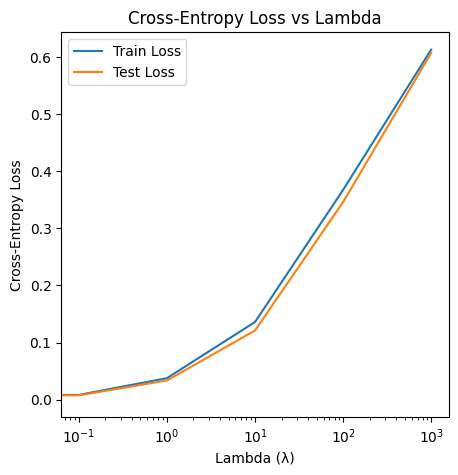

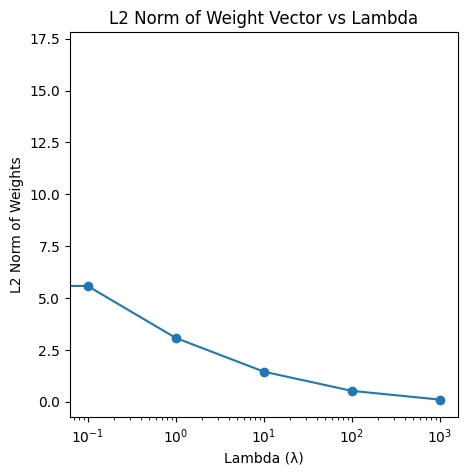

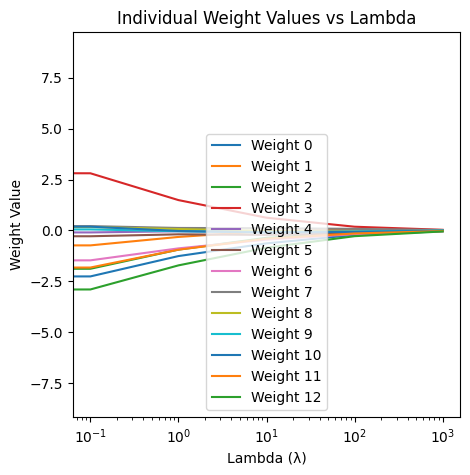

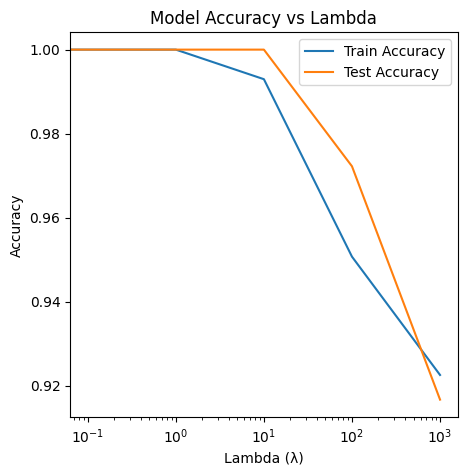

In [17]:
#Step (d): Logistic Regression with Varying λ
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
weight_norms = []
weights_all = []

for l in lambdas:
    C_inv = 1 / l if l != 0 else 1e12  # Avoid division by zero->as it leads to error
    model = LogisticRegression(
        penalty='l2', C=C_inv, solver='liblinear', max_iter=1000
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict_proba(X_test)[:, 1]

    # Storing the cross-entropy (log loss) of training predictions
    train_losses.append(log_loss(y_train, y_train_pred))

    # Storing the cross-entropy (log loss) of test predictions
    test_losses.append(log_loss(y_test, y_test_pred))

    # Storing training accuracy (how many train labels predicted correctly)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))

    # Storing testing accuracy (how many test labels predicted correctly)
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

    # Storing the L2 norm (magnitude) of the weight vector
    weight_norms.append(np.linalg.norm(model.coef_))

    # Storing the actual weight values (flattened into 1D array for easy plotting)
    weights_all.append(model.coef_.flatten())

# Ploting Cross-Entropy vs Lambda
plt.figure(figsize=(5,5))
plt.plot(lambdas, train_losses, label='Train Loss')
plt.plot(lambdas, test_losses, label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs Lambda')
plt.legend()
plt.show()

# Ploting Weight Norm vs Lambda
plt.figure(figsize=(5,5))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm of Weight Vector vs Lambda')
plt.show()

# Ploting Individual Weights vs Lambda
weights_all = np.array(weights_all)
plt.figure(figsize=(5,5))
for i in range(weights_all.shape[1]):
    plt.plot(lambdas, weights_all[:, i], label=f'Weight {i}')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('Weight Value')
plt.title('Individual Weight Values vs Lambda')
plt.legend()
plt.show()

# Ploting Accuracy vs Lambda
plt.figure(figsize=(5,5))
plt.plot(lambdas, train_accuracies, label='Train Accuracy')
plt.plot(lambdas, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Lambda')
plt.legend()
plt.show()


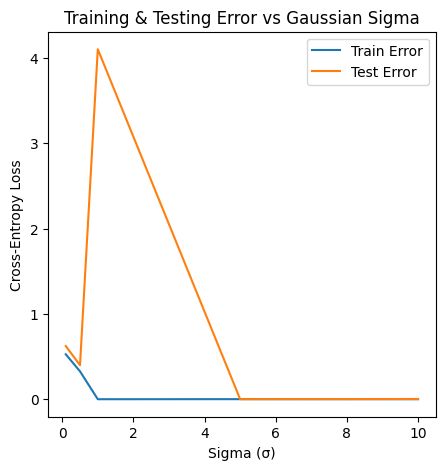

In [18]:
#Step (e): Gaussian Basis Function Transformation
def gaussian_basis_function(x, mu, sigma):
    return np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))

def transform_with_gaussian_basis(X, num_basis=5, mu_min=-10, mu_max=10, sigma=1):
    n_samples, n_features = X.shape
    mus = np.linspace(mu_min, mu_max, num_basis)

    X_new = []
    for i in range(n_features):
        for mu in mus:
            X_new.append(gaussian_basis_function(X[:, i], mu, sigma))

    X_new = np.array(X_new).T
    return X_new

sigma_values = [0.1, 0.5, 1, 5, 10]
train_errors = []
test_errors = []

for sigma in sigma_values:
    # Transform train and test data using Gaussian basis functions for this σ
    X_train_g = transform_with_gaussian_basis(X_train, sigma=sigma)
    X_test_g = transform_with_gaussian_basis(X_test, sigma=sigma)

    # Training logistic regression without regularization on transformed data
    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
    model.fit(X_train_g, y_train)

    # Predicting probabilities for training set
    y_train_pred = model.predict_proba(X_train_g)[:, 1]

    # Predicting probabilities for testing set
    y_test_pred = model.predict_proba(X_test_g)[:, 1]

    # Storing training error (cross-entropy loss)
    train_errors.append(log_loss(y_train, y_train_pred))

    # Storing testing error (cross-entropy loss)
    test_errors.append(log_loss(y_test, y_test_pred))


# Plot Training vs Testing Error for Different Sigma Values
plt.figure(figsize=(5,5))
plt.plot(sigma_values, train_errors, label='Train Error')
plt.plot(sigma_values, test_errors, label='Test Error')
plt.xlabel('Sigma (σ)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training & Testing Error vs Gaussian Sigma')
plt.legend()
plt.show()


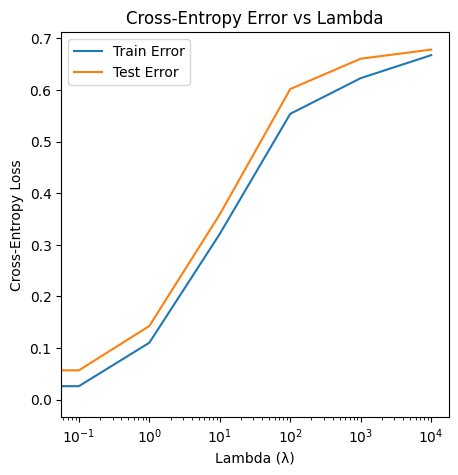

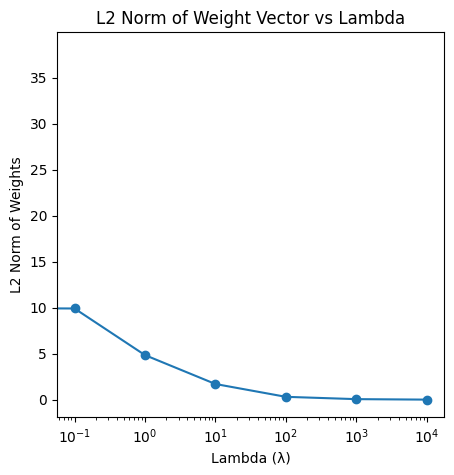

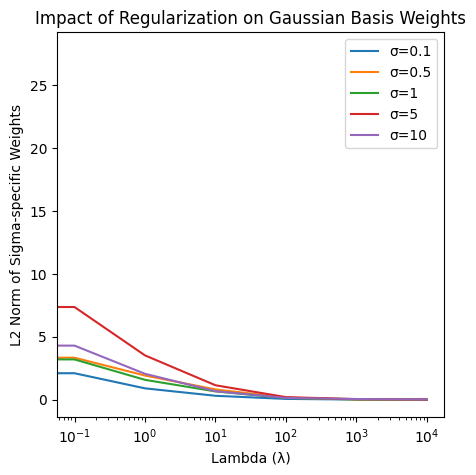

In [21]:
#Step (f): Gaussian Basis Regularization
from sklearn.linear_model import LogisticRegression

lambdas_extended = [0, 0.1, 1, 10, 100, 1000, 10000]
train_errors_reg, test_errors_reg = [], []
weight_norms_reg = []
sigma_weight_norms = {sigma: [] for sigma in sigma_values}

# Combine Gaussian Basis for All Sigma Values
X_train_all = np.hstack([
    transform_with_gaussian_basis(X_train, sigma=sigma) for sigma in sigma_values
])
X_test_all = np.hstack([
    transform_with_gaussian_basis(X_test, sigma=sigma) for sigma in sigma_values
])
for l in lambdas_extended:
    # set regularization strength
    C_inv = 1 / l if l != 0 else 1e12

    # training model
    model = LogisticRegression(penalty='l2', C=C_inv, solver='liblinear', max_iter=1000)
    model.fit(X_train_all, y_train)

    # predicting train
    y_train_pred = model.predict_proba(X_train_all)[:, 1]

    # predicting test
    y_test_pred = model.predict_proba(X_test_all)[:, 1]

    # storing train error
    train_errors_reg.append(log_loss(y_train, y_train_pred))

    # storing test error
    test_errors_reg.append(log_loss(y_test, y_test_pred))

    # storing overall weight size
    weight_norms_reg.append(np.linalg.norm(model.coef_))

    # loop through each sigma block
    start_idx = 0
    for sigma in sigma_values:
        end_idx = start_idx + X_train.shape[1] * 5

        # storing weight size for this sigma
        norm = np.linalg.norm(model.coef_[:, start_idx:end_idx])
        sigma_weight_norms[sigma].append(norm)

        # move to next block
        start_idx = end_idx


# Plot Cross-Entropy Error vs Lambda
plt.figure(figsize=(5,5))
plt.plot(lambdas_extended, train_errors_reg, label='Train Error')
plt.plot(lambdas_extended, test_errors_reg, label='Test Error')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Error vs Lambda')
plt.legend()
plt.show()

# Plot L2 Norm of Weights vs Lambda
plt.figure(figsize=(5,5))
plt.plot(lambdas_extended, weight_norms_reg, marker='o')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm of Weight Vector vs Lambda')
plt.show()

# Plot Sigma-specific Weight Norms vs Lambda
plt.figure(figsize=(5,5))
for sigma in sigma_values:
    plt.plot(lambdas_extended, sigma_weight_norms[sigma], label=f'σ={sigma}')
plt.xscale('log')
plt.xlabel('Lambda (λ)')
plt.ylabel('L2 Norm of Sigma-specific Weights')
plt.title('Impact of Regularization on Gaussian Basis Weights')
plt.legend()
plt.show()


(g)As λ (regularization strength) increases:
    - The model becomes more constrained.
    - The cross-entropy training error typically increases, but testing error often improves initially (due to reduced overfitting) before degrading (too much regularization leads to underfitting).

 The L2 norm of weights decreases with higher λ because large weights are penalized.

 For individual σ (Gaussian basis function width):
    - Small σ (like 0.1) results in highly localized basis functions, increasing model complexity and overfitting.
    - Large σ (like 10) creates very smooth basis functions, potentially underfitting by not capturing fine-grained patterns.
THUS - There's a clear bias-variance trade-off.
     - Optimal λ and σ balance the model complexity and regularization to generalize well on unseen data.


(h)In Current Approach:
    - We use univariate Gaussian basis functions (each feature transformed independently).
    
To capture relationships between inputs:
    - we need to use multivariate Gaussian basis functions of the form:
      φ(x) = exp(-||x - μ||² / (2σ²))
    - μ becomes a vector in the input feature space.
Impact on Bias-Variance Trade-off:

    - Adv:

        - Better modeling of complex interactions between features.
        - Increased expressiveness.

    - Disadv:

        - Large number of basis functions → risk of overfitting.
        - Requires careful regularization and cross-validation to control variance.
        - Computationally expensive.

THUS Using multivariate basis functions improves flexibility but increases the need for regularization and careful parameter tuning.


In [24]:
#(i)Adaptive Gaussian Basis Functions
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def gaussian_basis(x, mu, sigma):
    """
    Gaussian basis function:
    φ(x) = exp( - (x - μ)^2 / (2σ^2) )
    """
    return np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))

def transform_basis(X, mus, sigma):
    """
    Transform the dataset using the current Gaussian centers (mus).
    For each feature, apply Gaussian basis functions at the given centers.
    """
    n_samples, n_features = X.shape
    features = []
    for j in range(n_features):      # Loop over each feature
        for mu in mus[j]:            # Loop over each center for this feature
            features.append(gaussian_basis(X[:, j], mu, sigma))
    return np.array(features).T      # Return transformed features


np.random.seed(42)
sigma = 1.0          # Fixed width of Gaussian functions
n_basis = 3          # Number of basis functions per feature
n_features = X_train.shape[1]

# Initializing Gaussian centers μ randomly for each feature
mus = [np.random.uniform(-2, 2, n_basis) for _ in range(n_features)]

# Training settings
learning_rate = 0.01
n_iterations = 10

for it in range(n_iterations):
    #Transform data using current mus ----
    X_train_g = transform_basis(X_train, mus, sigma)
    X_test_g = transform_basis(X_test, mus, sigma)

    #Train Logistic Regression (optimize weights w) ----
    model = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=500)
    model.fit(X_train_g, y_train)

    #Updating Gaussian centers μ using gradient descent ----
    w = model.coef_.flatten()   # Get current weight vector
    start_idx = 0
    for j in range(n_features):      # Loop over features
        for k in range(n_basis):     # Loop over basis functions
            # φ(x) = Gaussian response for current μ
            phi = gaussian_basis(X_train[:, j], mus[j][k], sigma)

            # Gradient of loss wrt μ
            grad_mu = np.sum((y_train - model.predict_proba(X_train_g)[:,1]) *
                             w[start_idx] * ((X_train[:, j] - mus[j][k]) / (sigma**2)) * phi)


            mus[j][k] += learning_rate * grad_mu
            start_idx += 1

    train_loss = log_loss(y_train, model.predict_proba(X_train_g)[:,1])
    print(f"Iteration {it+1}, Training Loss: {train_loss:.4f}")

"""
 At each iteration:
   - Logistic regression optimizes the weights (w).
   - μ (centers of Gaussians) are shifted using gradient descent to better fit the data.
 The loss usually decreases over iterations, showing that both μ and w are adapting.
 The algorithm converges, but only to a LOCAL optimum (not guaranteed global).
"""

Iteration 1, Training Loss: 0.0636
Iteration 2, Training Loss: 0.0633
Iteration 3, Training Loss: 0.0630
Iteration 4, Training Loss: 0.0627
Iteration 5, Training Loss: 0.0624
Iteration 6, Training Loss: 0.0621
Iteration 7, Training Loss: 0.0619
Iteration 8, Training Loss: 0.0616
Iteration 9, Training Loss: 0.0614
Iteration 10, Training Loss: 0.0611


 (j)Does the algorithm converge?
    -> Yes, typically converges to a local minimum of the loss function.

 Local vs Global Optimum:
    ->Non-convex nature of the problem means:
    - Global optimum is not guaranteed.
    - Depends heavily on initialization and learning rate.
Practical Impact:

    -> Algorithm provides good performance if hyperparameters (learning rate η, σ, regularization λ) are chosen carefully.
    -> Multiple random initializations can improve chances of finding a better local minimum.


**2.Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and
logistic regression (CLASSIFICATION) along with complete data preprocessing steps**

In [26]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_auc_score, roc_curve

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target  # X contains features, y contains target labels (3 classes)

# Print basic dataset info
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling so that features have mean=0 and std=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Feature matrix shape: (178, 13)
Target vector shape: (178,)
Number of classes: 3



Linear Regression Example (For Demonstration)
Mean Squared Error: 0.0685


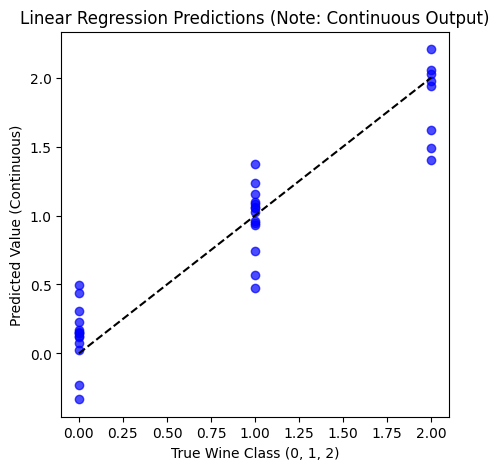

In [28]:
#Linear regression demonstration
# Initialize and train a simple Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Target y contains class labels as integers (0, 1, 2)

# Predict on test set
y_pred_lin = lin_reg.predict(X_test)

# Compute Mean Squared Error (MSE)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print(f"\nLinear Regression Example (For Demonstration)")
print(f"Mean Squared Error: {mse_lin:.4f}")

# Plot True vs Predicted values
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_lin, alpha=0.7, color='blue')
plt.plot([0, 2], [0, 2], linestyle='--', color='black')
plt.xlabel('True Wine Class (0, 1, 2)')
plt.ylabel('Predicted Value (Continuous)')
plt.title('Linear Regression Predictions (Note: Continuous Output)')
plt.show()



Ridge Regression MSE: 0.0687
Lasso Regression MSE: 0.0950


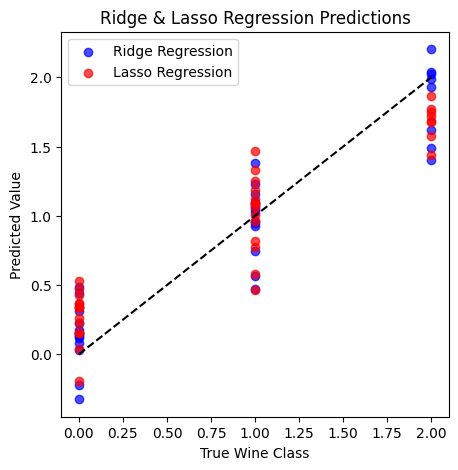

In [33]:
# Ridge Regression (L2 regularization)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression (L1 regularization)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"\nRidge Regression MSE: {mse_ridge:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")

# Visual comparison
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_ridge, alpha=0.7, label='Ridge Regression',color="blue")
plt.scatter(y_test, y_pred_lasso, alpha=0.7, label='Lasso Regression',color="red")
plt.plot([0, 2], [0, 2], linestyle='--', color='black')
plt.xlabel('True Wine Class')
plt.ylabel('Predicted Value')
plt.title('Ridge & Lasso Regression Predictions')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Classification Results
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



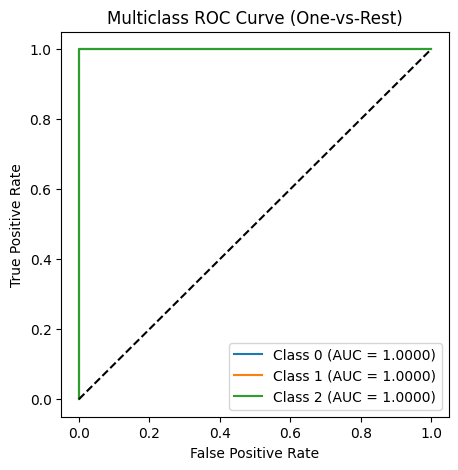

In [31]:
# Logistic Regression for multiclass classification (using "one-vs-rest")
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', multi_class='auto')
log_reg.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred_class = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
report = classification_report(y_test, y_pred_class)

print(f"\nLogistic Regression Classification Results")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Plot ROC curve for multiclass (One-vs-Rest)
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(5,5))
for i in range(3):  # 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()
